<a href="https://colab.research.google.com/github/shikarRajcomar-Engineer/Ensemble/blob/master/Advanced_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

path='/content/drive/My Drive/B1-Msc experiment/'    
Results=pd.DataFrame([])
Results1=pd.DataFrame([])
Results2=pd.DataFrame([])
Results3=pd.DataFrame([])
Results4=pd.DataFrame([])
Results5=pd.DataFrame([])
Results6=pd.DataFrame([])

aResults=pd.DataFrame([])
aResults1=pd.DataFrame([])
aResults2=pd.DataFrame([])
aResults3=pd.DataFrame([])
aResults4=pd.DataFrame([])
aResults5=pd.DataFrame([])
aResults6=pd.DataFrame([])

bResults=pd.DataFrame([])
bResults1=pd.DataFrame([])
bResults2=pd.DataFrame([])
bResults3=pd.DataFrame([])
bResults4=pd.DataFrame([])
bResults5=pd.DataFrame([])
bResults6=pd.DataFrame([])

cResults=pd.DataFrame([])
cResults1=pd.DataFrame([])
cResults2=pd.DataFrame([])
cResults3=pd.DataFrame([])
cResults4=pd.DataFrame([])
cResults5=pd.DataFrame([])
cResults6=pd.DataFrame([])

dResults=pd.DataFrame([])
dResults1=pd.DataFrame([])
dResults2=pd.DataFrame([])
dResults3=pd.DataFrame([])
dResults4=pd.DataFrame([])
dResults5=pd.DataFrame([])
dResults6=pd.DataFrame([])

eResults=pd.DataFrame([])
eResults1=pd.DataFrame([])
eResults2=pd.DataFrame([])
eResults3=pd.DataFrame([])
eResults4=pd.DataFrame([])
eResults5=pd.DataFrame([])
eResults6=pd.DataFrame([])

fResults=pd.DataFrame([])
fResults1=pd.DataFrame([])
fResults2=pd.DataFrame([])
fResults3=pd.DataFrame([])
fResults4=pd.DataFrame([])
fResults5=pd.DataFrame([])
fResults6=pd.DataFrame([])



Dataset=['candy224']
Dataset1=['composition_vii224']
Dataset2=['feathers224']
Dataset3=['la_muse224']
Dataset4=['mosaic224']
Dataset5=['starry_night224']
Dataset6=['the_scream224']
# Dataset14=['the_wave224']
# Dataset15=['udnie224']
# Dataset16=['samplepair224']






# candy224

Using TensorFlow backend.


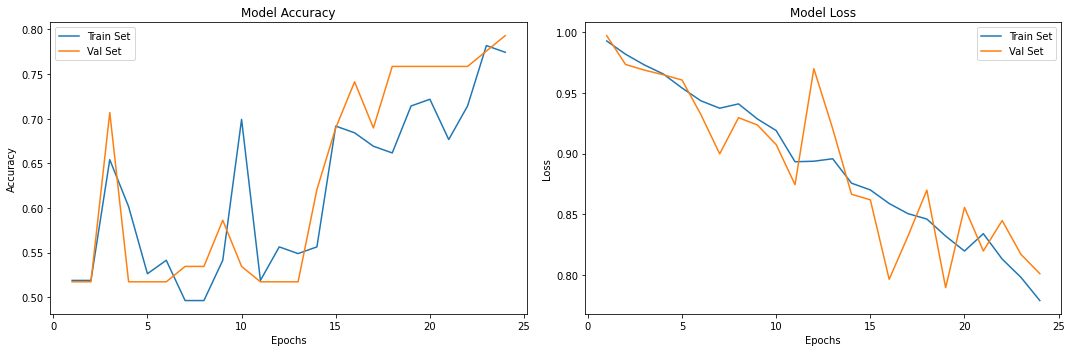

Train: 0.594, Test: 0.552


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.535714,0.551724,0.767857,0.759852,No Aug,candy224,79.310346,77.443612
recall,0.071429,1.000000,0.551724,0.535714,0.551724,No Aug,candy224,79.310346,77.443612
f1-score,0.133333,0.697674,0.551724,0.415504,0.425234,No Aug,candy224,79.310346,77.443612
support,28.000000,30.000000,0.551724,58.000000,58.000000,No Aug,candy224,79.310346,77.443612


In [3]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    



batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results=Results.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results)
keras.backend.clear_session()


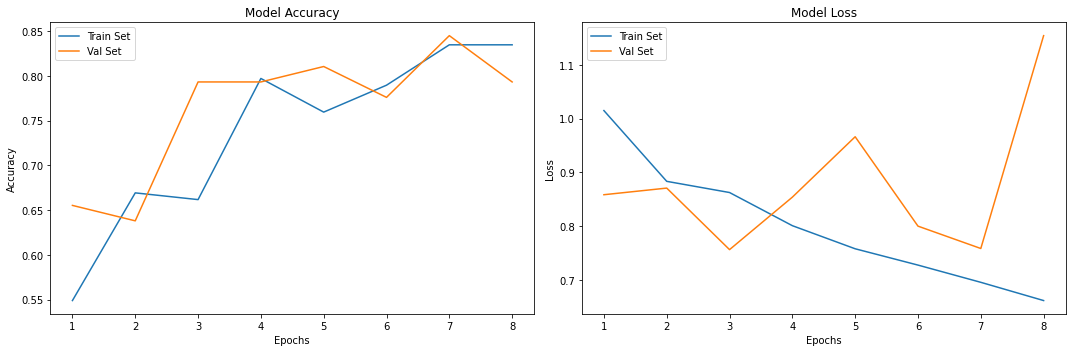

Train: 0.902, Test: 0.810


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.731707,0.810345,0.865854,0.861228,HorizontalFlip,candy224,79.310346,83.458644
recall,0.607143,1.000000,0.810345,0.803571,0.810345,HorizontalFlip,candy224,79.310346,83.458644
f1-score,0.755556,0.845070,0.810345,0.800313,0.801856,HorizontalFlip,candy224,79.310346,83.458644
support,28.000000,30.000000,0.810345,58.000000,58.000000,HorizontalFlip,candy224,79.310346,83.458644


In [4]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results1=Results1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results1)
keras.backend.clear_session()


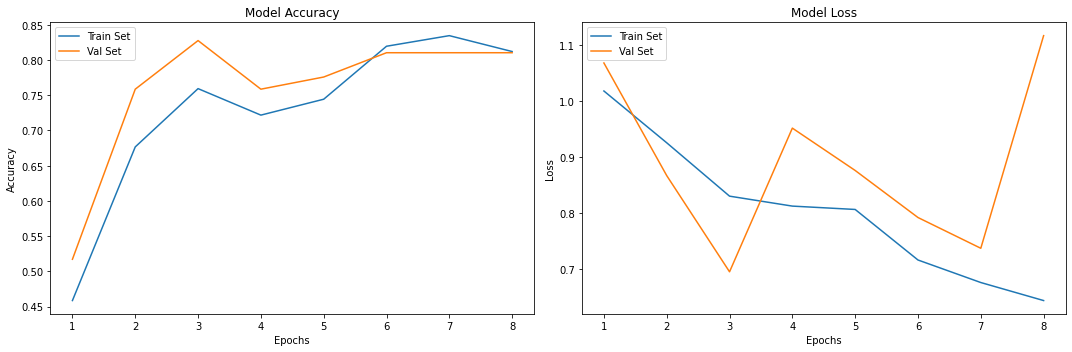

Train: 0.865, Test: 0.810


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.947368,0.743590,0.810345,0.845479,0.841966,vertialFLip,candy224,81.034482,81.203008
recall,0.642857,0.966667,0.810345,0.804762,0.810345,vertialFLip,candy224,81.034482,81.203008
f1-score,0.765957,0.840580,0.810345,0.803269,0.804555,vertialFLip,candy224,81.034482,81.203008
support,28.000000,30.000000,0.810345,58.000000,58.000000,vertialFLip,candy224,81.034482,81.203008


In [5]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results2=Results2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results2)
keras.backend.clear_session()


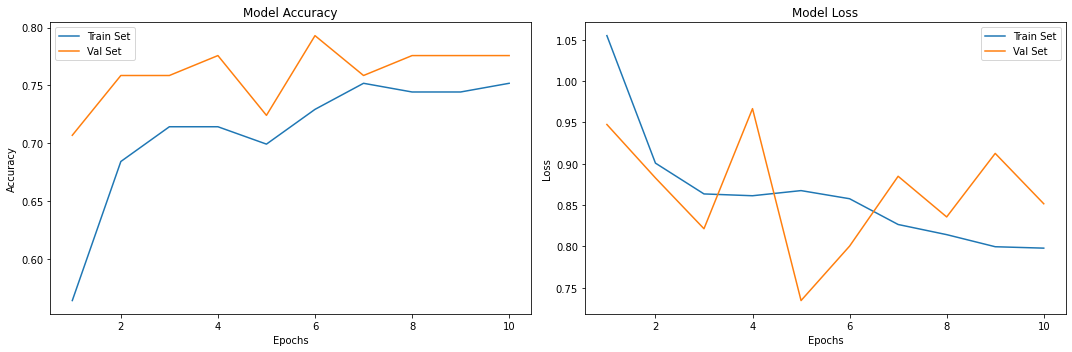

Train: 0.752, Test: 0.810


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.947368,0.743590,0.810345,0.845479,0.841966,Rotate,candy224,77.58621,75.187969
recall,0.642857,0.966667,0.810345,0.804762,0.810345,Rotate,candy224,77.58621,75.187969
f1-score,0.765957,0.840580,0.810345,0.803269,0.804555,Rotate,candy224,77.58621,75.187969
support,28.000000,30.000000,0.810345,58.000000,58.000000,Rotate,candy224,77.58621,75.187969


In [6]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results3=Results3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results3)
keras.backend.clear_session()


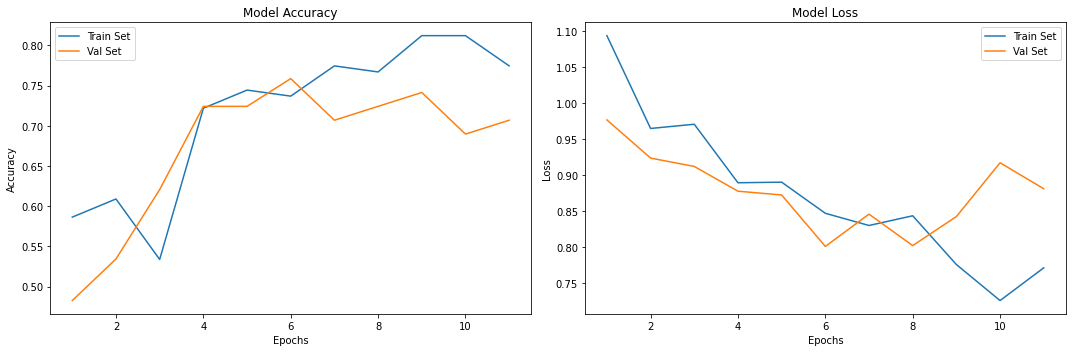

Train: 0.797, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.941176,0.707317,0.775862,0.824247,0.820215,Shear,candy224,70.689654,77.443612
recall,0.571429,0.966667,0.775862,0.769048,0.775862,Shear,candy224,70.689654,77.443612
f1-score,0.711111,0.816901,0.775862,0.764006,0.765830,Shear,candy224,70.689654,77.443612
support,28.000000,30.000000,0.775862,58.000000,58.000000,Shear,candy224,70.689654,77.443612


In [7]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results4=Results4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results4)
keras.backend.clear_session()


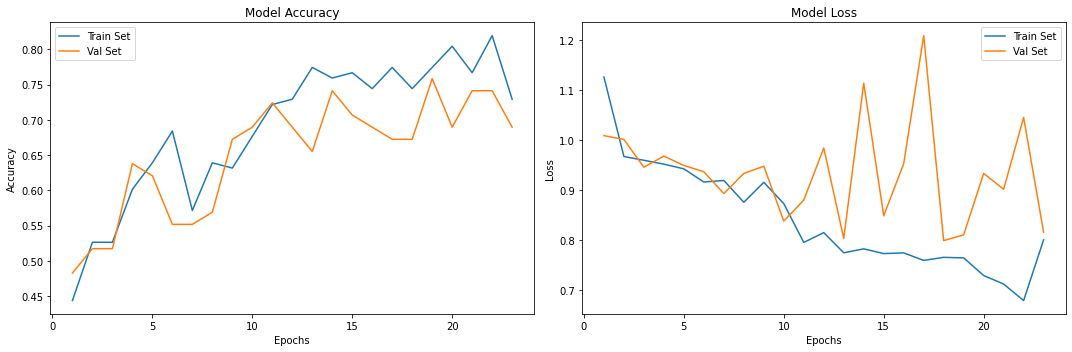

Train: 0.835, Test: 0.690


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.727273,0.666667,0.689655,0.696970,0.695925,Width,candy224,68.965518,72.932333
recall,0.571429,0.800000,0.689655,0.685714,0.689655,Width,candy224,68.965518,72.932333
f1-score,0.640000,0.727273,0.689655,0.683636,0.685141,Width,candy224,68.965518,72.932333
support,28.000000,30.000000,0.689655,58.000000,58.000000,Width,candy224,68.965518,72.932333


In [8]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results5=Results5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results5)
keras.backend.clear_session()


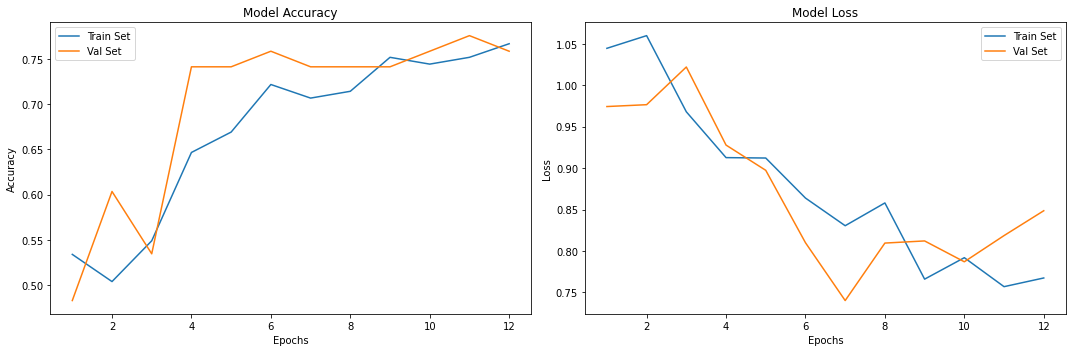

Train: 0.797, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.888889,0.700000,0.758621,0.794444,0.791188,height,candy224,75.862068,76.691729
recall,0.571429,0.933333,0.758621,0.752381,0.758621,height,candy224,75.862068,76.691729
f1-score,0.695652,0.800000,0.758621,0.747826,0.749625,height,candy224,75.862068,76.691729
support,28.000000,30.000000,0.758621,58.000000,58.000000,height,candy224,75.862068,76.691729


In [9]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results6=Results6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results6)
keras.backend.clear_session()


# composition_vii224 Dataset

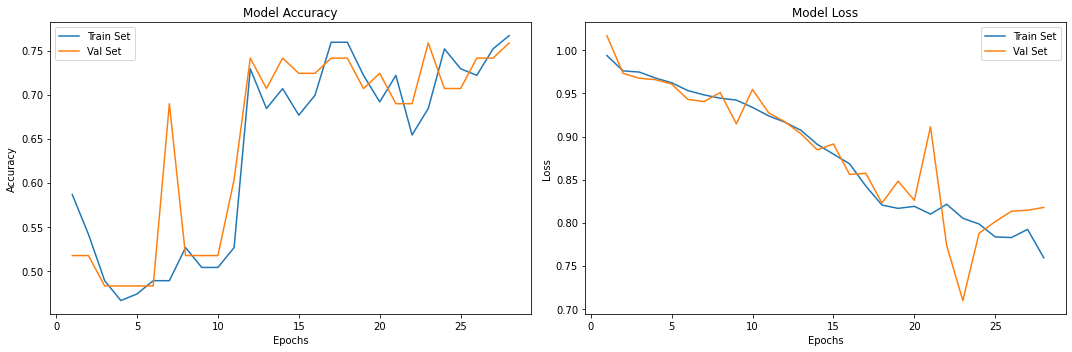

Train: 0.526, Test: 0.517


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.0,0.517241,0.517241,0.258621,0.267539,No Aug,composition_vii224,75.862068,76.691729
recall,0.0,1.000000,0.517241,0.500000,0.517241,No Aug,composition_vii224,75.862068,76.691729
f1-score,0.0,0.681818,0.517241,0.340909,0.352665,No Aug,composition_vii224,75.862068,76.691729
support,28.0,30.000000,0.517241,58.000000,58.000000,No Aug,composition_vii224,75.862068,76.691729


In [10]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



batch_size=32
steps=100


hist_results=[]


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))

optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults=aResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults)
keras.backend.clear_session()


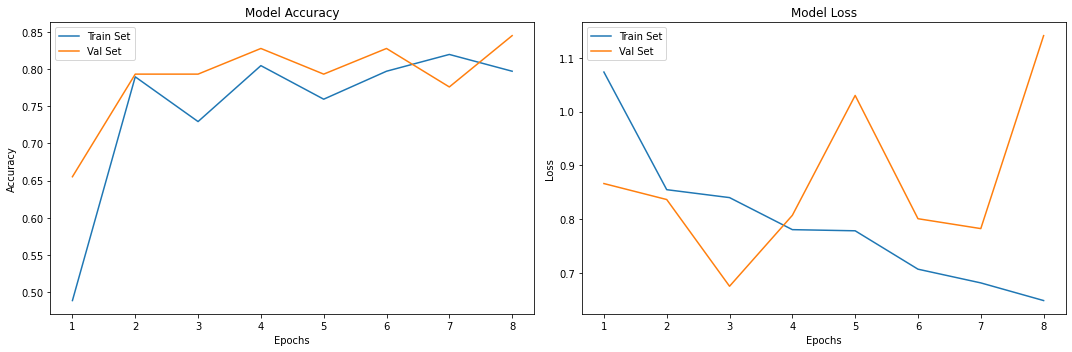

Train: 0.880, Test: 0.845


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.769231,0.844828,0.884615,0.880637,HorizontalFlip,composition_vii224,84.482759,79.699248
recall,0.678571,1.000000,0.844828,0.839286,0.844828,HorizontalFlip,composition_vii224,84.482759,79.699248
f1-score,0.808511,0.869565,0.844828,0.839038,0.840091,HorizontalFlip,composition_vii224,84.482759,79.699248
support,28.000000,30.000000,0.844828,58.000000,58.000000,HorizontalFlip,composition_vii224,84.482759,79.699248


In [11]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults1=aResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults1)
keras.backend.clear_session()


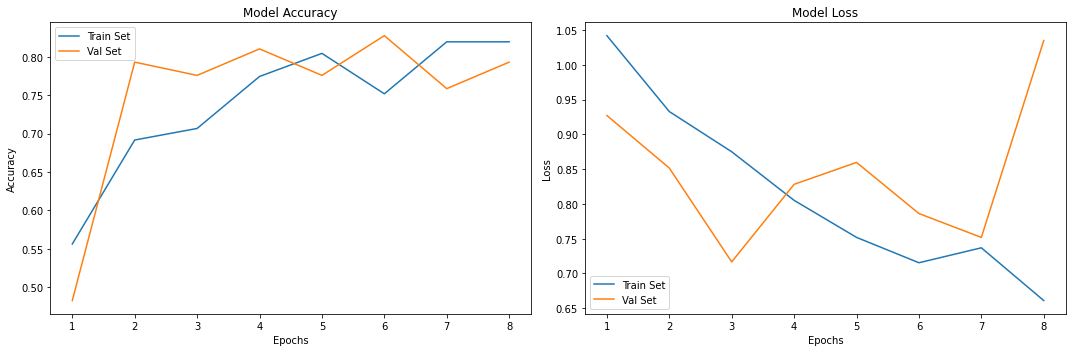

Train: 0.880, Test: 0.810


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.947368,0.743590,0.810345,0.845479,0.841966,vertialFLip,composition_vii224,79.310346,81.954885
recall,0.642857,0.966667,0.810345,0.804762,0.810345,vertialFLip,composition_vii224,79.310346,81.954885
f1-score,0.765957,0.840580,0.810345,0.803269,0.804555,vertialFLip,composition_vii224,79.310346,81.954885
support,28.000000,30.000000,0.810345,58.000000,58.000000,vertialFLip,composition_vii224,79.310346,81.954885


In [12]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults2=aResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults2)
keras.backend.clear_session()


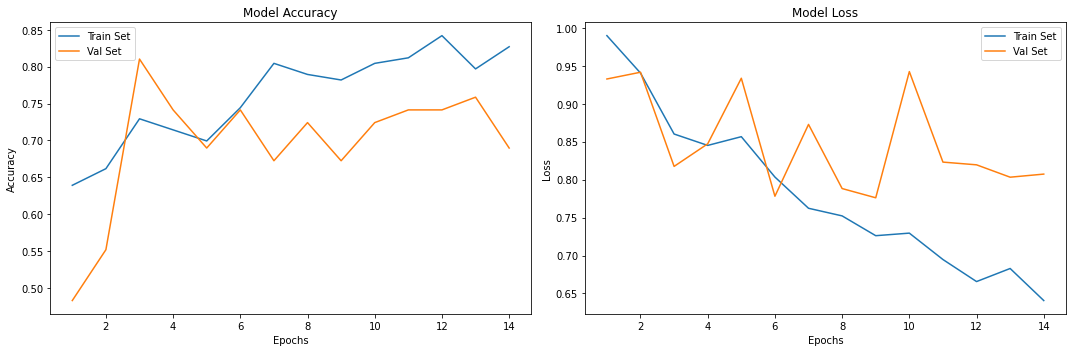

Train: 0.865, Test: 0.724


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.730769,0.718750,0.724138,0.724760,0.724552,Rotate,composition_vii224,68.965518,82.706767
recall,0.678571,0.766667,0.724138,0.722619,0.724138,Rotate,composition_vii224,68.965518,82.706767
f1-score,0.703704,0.741935,0.724138,0.722820,0.723479,Rotate,composition_vii224,68.965518,82.706767
support,28.000000,30.000000,0.724138,58.000000,58.000000,Rotate,composition_vii224,68.965518,82.706767


In [13]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults3=aResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults3)
keras.backend.clear_session()


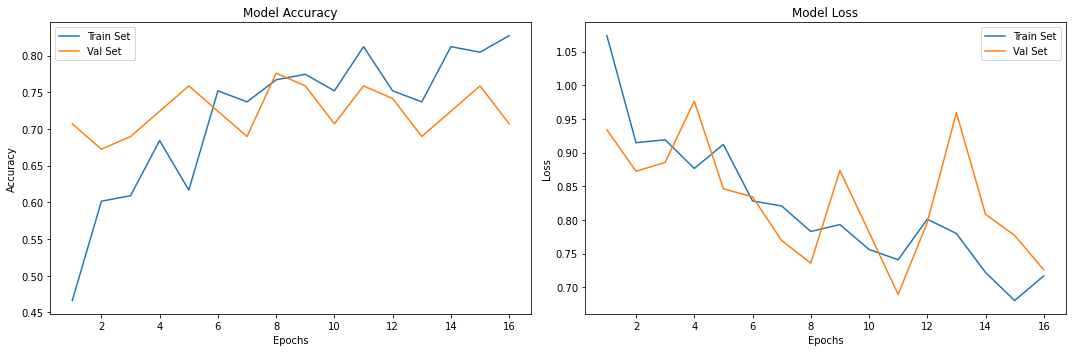

Train: 0.827, Test: 0.707


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.739130,0.685714,0.706897,0.712422,0.711501,Shear,composition_vii224,70.689654,82.706767
recall,0.607143,0.800000,0.706897,0.703571,0.706897,Shear,composition_vii224,70.689654,82.706767
f1-score,0.666667,0.738462,0.706897,0.702564,0.703802,Shear,composition_vii224,70.689654,82.706767
support,28.000000,30.000000,0.706897,58.000000,58.000000,Shear,composition_vii224,70.689654,82.706767


In [14]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults4=aResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults4)
keras.backend.clear_session()


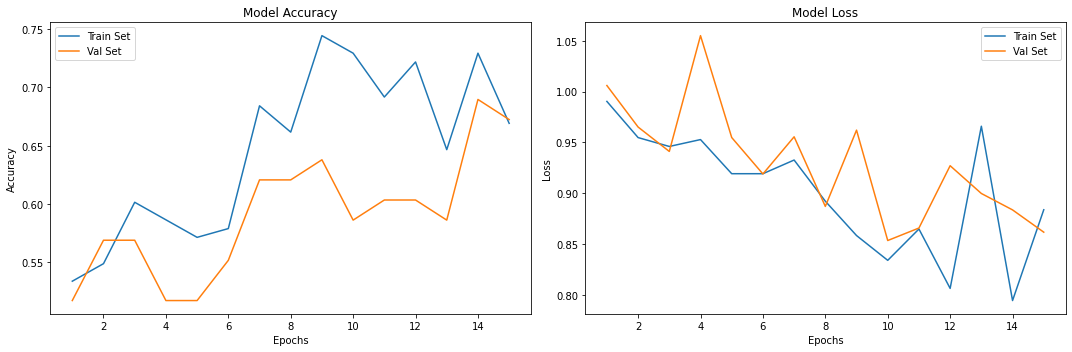

Train: 0.744, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.791667,0.735294,0.758621,0.763480,0.762508,Width,composition_vii224,67.241377,66.917294
recall,0.678571,0.833333,0.758621,0.755952,0.758621,Width,composition_vii224,67.241377,66.917294
f1-score,0.730769,0.781250,0.758621,0.756010,0.756880,Width,composition_vii224,67.241377,66.917294
support,28.000000,30.000000,0.758621,58.000000,58.000000,Width,composition_vii224,67.241377,66.917294


In [15]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults5=aResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults5)
keras.backend.clear_session()


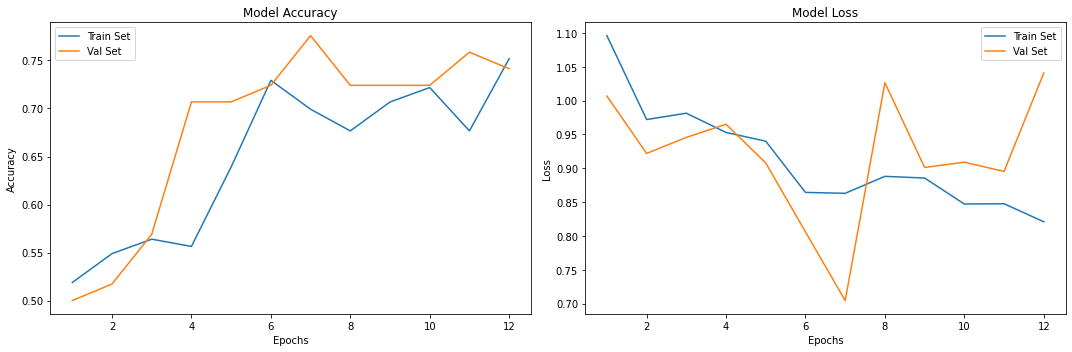

Train: 0.797, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.894737,0.717949,0.775862,0.806343,0.803295,height,composition_vii224,74.137932,75.187969
recall,0.607143,0.933333,0.775862,0.770238,0.775862,height,composition_vii224,74.137932,75.187969
f1-score,0.723404,0.811594,0.775862,0.767499,0.769020,height,composition_vii224,74.137932,75.187969
support,28.000000,30.000000,0.775862,58.000000,58.000000,height,composition_vii224,74.137932,75.187969


In [16]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults6=aResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults6)
keras.backend.clear_session()


# feathers224

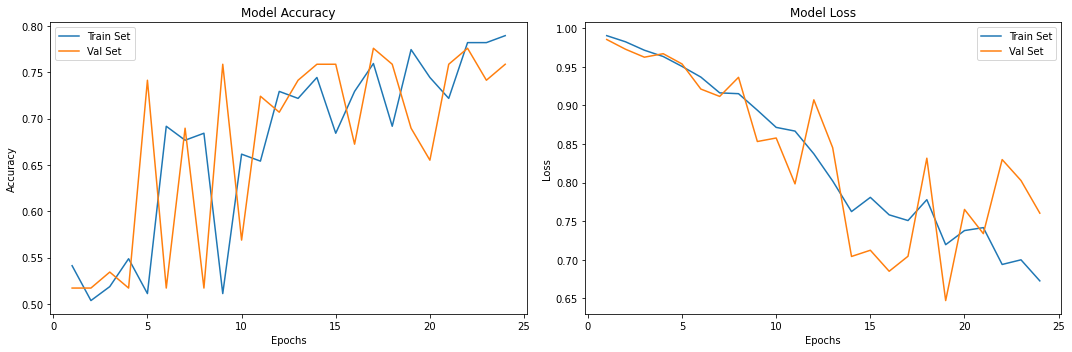

Train: 0.752, Test: 0.724


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.652174,0.724138,0.826087,0.820090,No Aug,feathers224,75.862068,78.947371
recall,0.428571,1.000000,0.724138,0.714286,0.724138,No Aug,feathers224,75.862068,78.947371
f1-score,0.600000,0.789474,0.724138,0.694737,0.698004,No Aug,feathers224,75.862068,78.947371
support,28.000000,30.000000,0.724138,58.000000,58.000000,No Aug,feathers224,75.862068,78.947371


In [17]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



batch_size=32
steps=100


hist_results=[]


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults=bResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults)
keras.backend.clear_session()


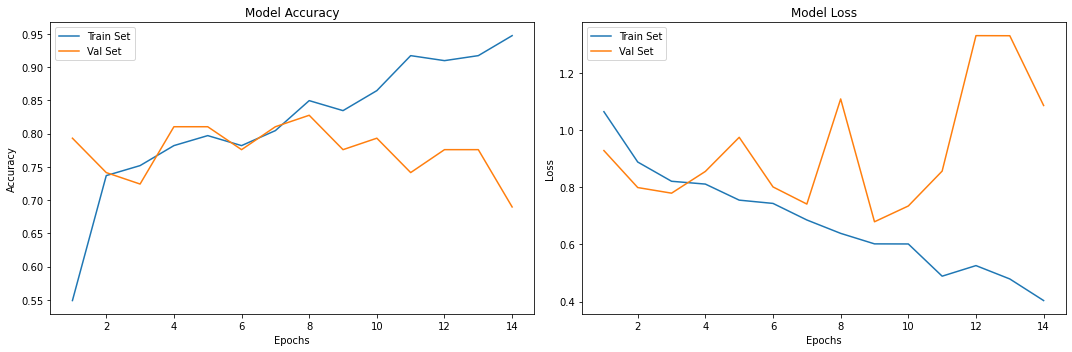

Train: 0.970, Test: 0.724


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.730769,0.718750,0.724138,0.724760,0.724552,HorizontalFlip,feathers224,68.965518,94.736844
recall,0.678571,0.766667,0.724138,0.722619,0.724138,HorizontalFlip,feathers224,68.965518,94.736844
f1-score,0.703704,0.741935,0.724138,0.722820,0.723479,HorizontalFlip,feathers224,68.965518,94.736844
support,28.000000,30.000000,0.724138,58.000000,58.000000,HorizontalFlip,feathers224,68.965518,94.736844


In [18]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults1=bResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults1)
keras.backend.clear_session()


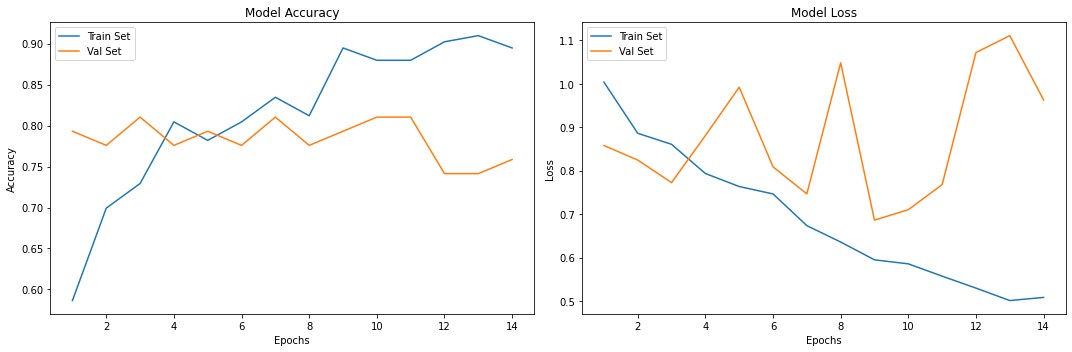

Train: 0.947, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.818182,0.722222,0.758621,0.770202,0.768548,vertialFLip,feathers224,75.862068,89.473683
recall,0.642857,0.866667,0.758621,0.754762,0.758621,vertialFLip,feathers224,75.862068,89.473683
f1-score,0.720000,0.787879,0.758621,0.753939,0.755110,vertialFLip,feathers224,75.862068,89.473683
support,28.000000,30.000000,0.758621,58.000000,58.000000,vertialFLip,feathers224,75.862068,89.473683


In [19]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults2=bResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults2)
keras.backend.clear_session()


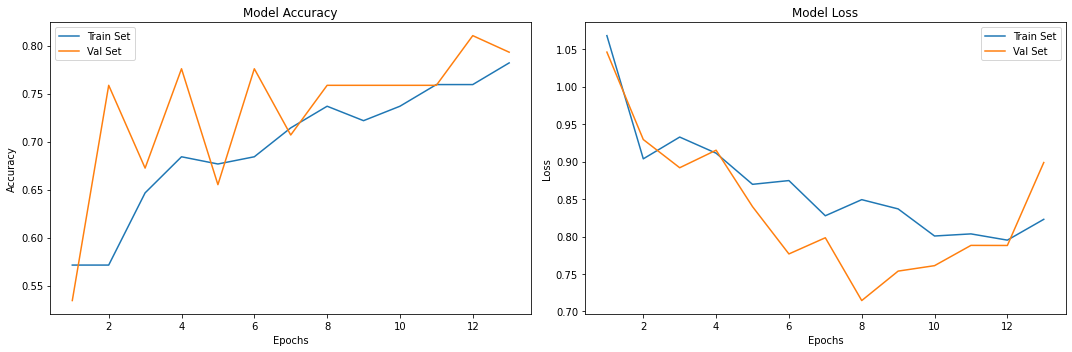

Train: 0.774, Test: 0.810


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.947368,0.743590,0.810345,0.845479,0.841966,Rotate,feathers224,79.310346,78.195488
recall,0.642857,0.966667,0.810345,0.804762,0.810345,Rotate,feathers224,79.310346,78.195488
f1-score,0.765957,0.840580,0.810345,0.803269,0.804555,Rotate,feathers224,79.310346,78.195488
support,28.000000,30.000000,0.810345,58.000000,58.000000,Rotate,feathers224,79.310346,78.195488


In [20]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults3=bResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults3)
keras.backend.clear_session()


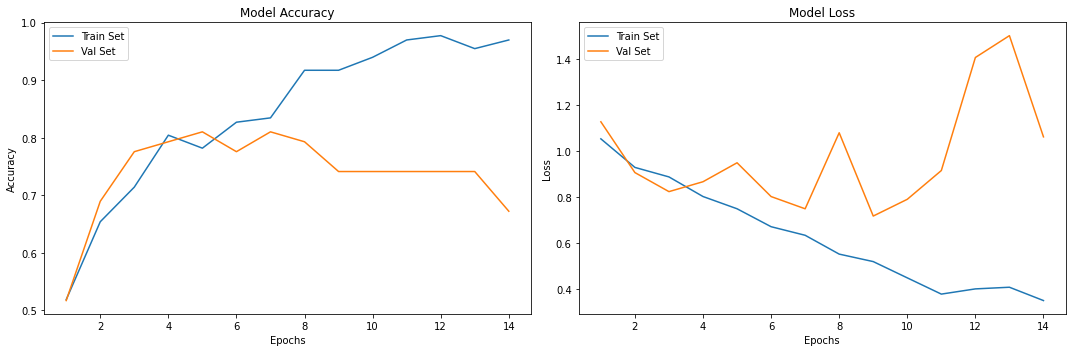

Train: 1.000, Test: 0.672


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.655172,0.689655,0.672414,0.672414,0.673008,Shear,feathers224,67.241377,96.992481
recall,0.678571,0.666667,0.672414,0.672619,0.672414,Shear,feathers224,67.241377,96.992481
f1-score,0.666667,0.677966,0.672414,0.672316,0.672511,Shear,feathers224,67.241377,96.992481
support,28.000000,30.000000,0.672414,58.000000,58.000000,Shear,feathers224,67.241377,96.992481


In [21]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults4=bResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults4)
keras.backend.clear_session()


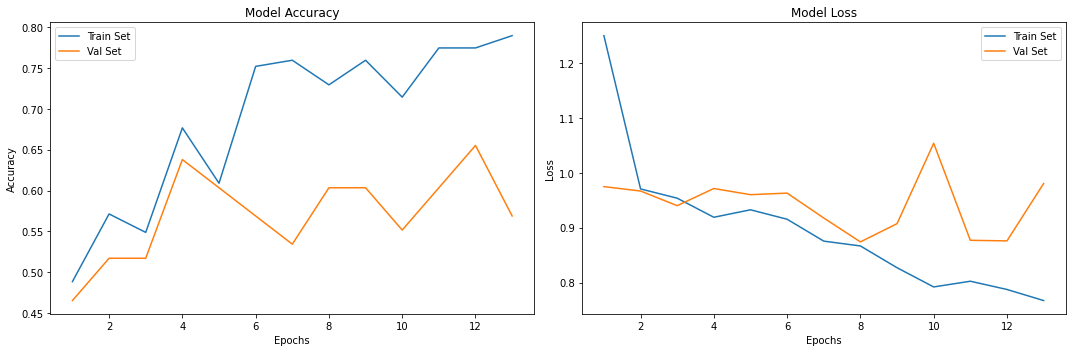

Train: 0.737, Test: 0.707


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.866667,0.651163,0.706897,0.758915,0.755199,Width,feathers224,56.896549,78.947371
recall,0.464286,0.933333,0.706897,0.698810,0.706897,Width,feathers224,56.896549,78.947371
f1-score,0.604651,0.767123,0.706897,0.685887,0.688688,Width,feathers224,56.896549,78.947371
support,28.000000,30.000000,0.706897,58.000000,58.000000,Width,feathers224,56.896549,78.947371


In [22]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults5=bResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults5)
keras.backend.clear_session()


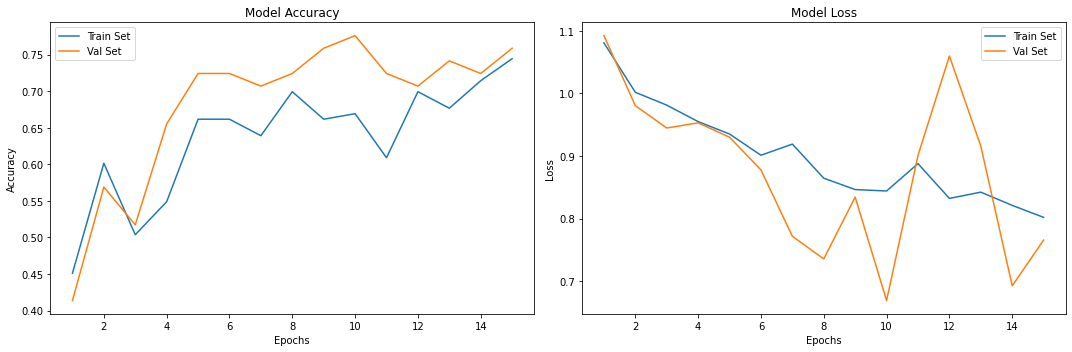

Train: 0.767, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.888889,0.700000,0.758621,0.794444,0.791188,height,candy224,75.862068,76.691729
recall,0.571429,0.933333,0.758621,0.752381,0.758621,height,candy224,75.862068,76.691729
f1-score,0.695652,0.800000,0.758621,0.747826,0.749625,height,candy224,75.862068,76.691729
support,28.000000,30.000000,0.758621,58.000000,58.000000,height,candy224,75.862068,76.691729


In [23]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults6=bResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results6)
keras.backend.clear_session()


# la_muse224 Dataset

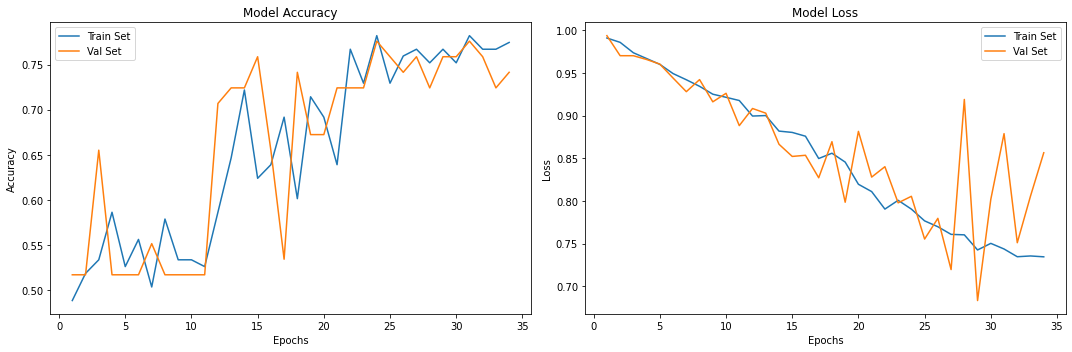

Train: 0.526, Test: 0.517


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.0,0.517241,0.517241,0.258621,0.267539,No Aug,la_muse224,74.137932,77.443612
recall,0.0,1.000000,0.517241,0.500000,0.517241,No Aug,la_muse224,74.137932,77.443612
f1-score,0.0,0.681818,0.517241,0.340909,0.352665,No Aug,la_muse224,74.137932,77.443612
support,28.0,30.000000,0.517241,58.000000,58.000000,No Aug,la_muse224,74.137932,77.443612


In [24]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults=cResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults)
keras.backend.clear_session()


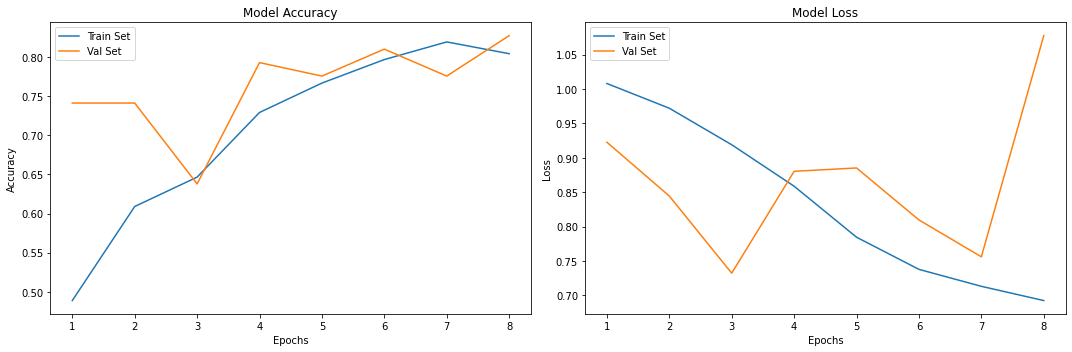

Train: 0.850, Test: 0.845


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.769231,0.844828,0.884615,0.880637,HorizontalFlip,la_muse224,82.758623,80.451125
recall,0.678571,1.000000,0.844828,0.839286,0.844828,HorizontalFlip,la_muse224,82.758623,80.451125
f1-score,0.808511,0.869565,0.844828,0.839038,0.840091,HorizontalFlip,la_muse224,82.758623,80.451125
support,28.000000,30.000000,0.844828,58.000000,58.000000,HorizontalFlip,la_muse224,82.758623,80.451125


In [25]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults1=cResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults1)
keras.backend.clear_session()


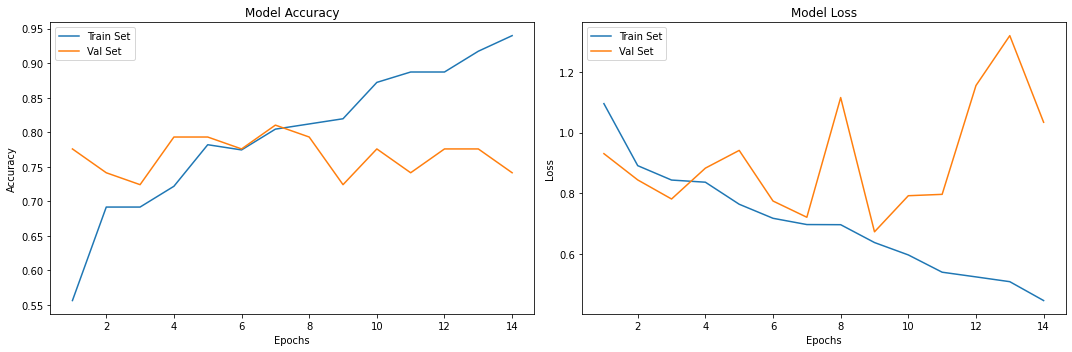

Train: 0.970, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.818182,0.722222,0.758621,0.770202,0.768548,vertialFLip,la_muse224,74.137932,93.984962
recall,0.642857,0.866667,0.758621,0.754762,0.758621,vertialFLip,la_muse224,74.137932,93.984962
f1-score,0.720000,0.787879,0.758621,0.753939,0.755110,vertialFLip,la_muse224,74.137932,93.984962
support,28.000000,30.000000,0.758621,58.000000,58.000000,vertialFLip,la_muse224,74.137932,93.984962


In [26]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults2=cResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults2)
keras.backend.clear_session()


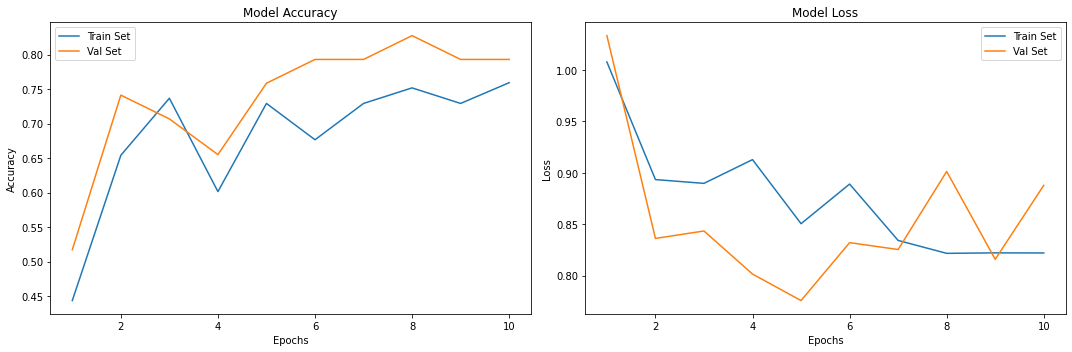

Train: 0.774, Test: 0.793


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.900000,0.736842,0.793103,0.818421,0.815608,Rotate,la_muse224,79.310346,75.939852
recall,0.642857,0.933333,0.793103,0.788095,0.793103,Rotate,la_muse224,79.310346,75.939852
f1-score,0.750000,0.823529,0.793103,0.786765,0.788032,Rotate,la_muse224,79.310346,75.939852
support,28.000000,30.000000,0.793103,58.000000,58.000000,Rotate,la_muse224,79.310346,75.939852


In [27]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults3=cResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults3)
keras.backend.clear_session()


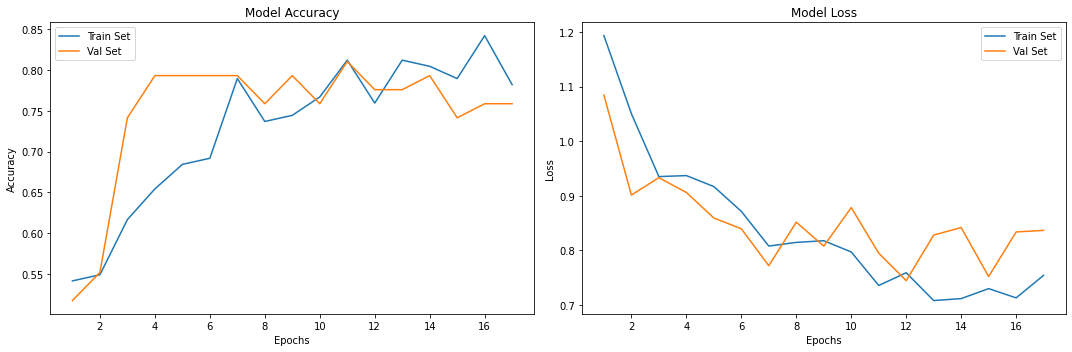

Train: 0.774, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.937500,0.690476,0.758621,0.813988,0.809729,Shear,la_muse224,75.862068,78.195488
recall,0.535714,0.966667,0.758621,0.751190,0.758621,Shear,la_muse224,75.862068,78.195488
f1-score,0.681818,0.805556,0.758621,0.743687,0.745820,Shear,la_muse224,75.862068,78.195488
support,28.000000,30.000000,0.758621,58.000000,58.000000,Shear,la_muse224,75.862068,78.195488


In [28]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults4=cResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults4)
keras.backend.clear_session()


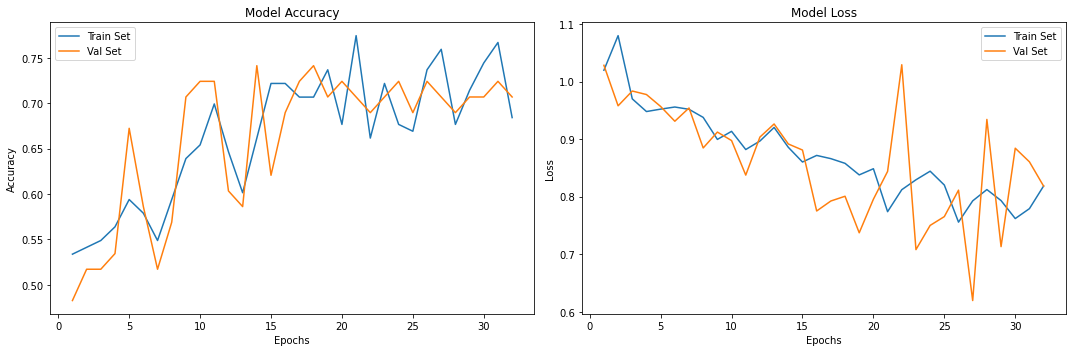

Train: 0.789, Test: 0.707


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.677419,0.740741,0.706897,0.709080,0.710172,Width,la_muse224,70.689654,68.421054
recall,0.750000,0.666667,0.706897,0.708333,0.706897,Width,la_muse224,70.689654,68.421054
f1-score,0.711864,0.701754,0.706897,0.706809,0.706635,Width,la_muse224,70.689654,68.421054
support,28.000000,30.000000,0.706897,58.000000,58.000000,Width,la_muse224,70.689654,68.421054


In [29]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults5=cResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults5)
keras.backend.clear_session()


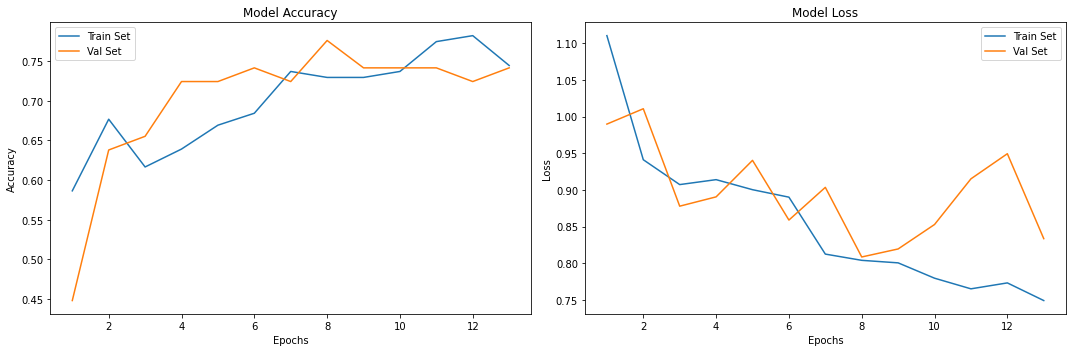

Train: 0.782, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.894737,0.717949,0.775862,0.806343,0.803295,height,la_muse224,74.137932,74.436092
recall,0.607143,0.933333,0.775862,0.770238,0.775862,height,la_muse224,74.137932,74.436092
f1-score,0.723404,0.811594,0.775862,0.767499,0.769020,height,la_muse224,74.137932,74.436092
support,28.000000,30.000000,0.775862,58.000000,58.000000,height,la_muse224,74.137932,74.436092


In [30]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults6=cResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults6)
keras.backend.clear_session()


#mosaic224 Dataset

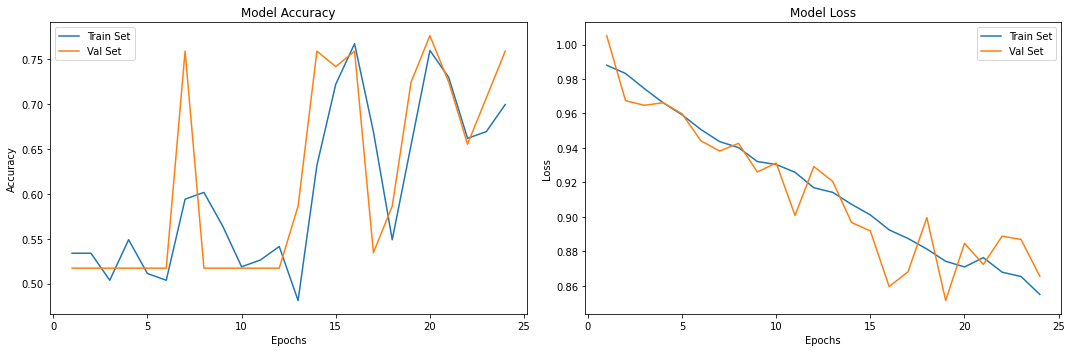

Train: 0.526, Test: 0.517


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.0,0.517241,0.517241,0.258621,0.267539,No Aug,mosaic224,75.862068,69.924814
recall,0.0,1.000000,0.517241,0.500000,0.517241,No Aug,mosaic224,75.862068,69.924814
f1-score,0.0,0.681818,0.517241,0.340909,0.352665,No Aug,mosaic224,75.862068,69.924814
support,28.0,30.000000,0.517241,58.000000,58.000000,No Aug,mosaic224,75.862068,69.924814


In [31]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults=dResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults)
keras.backend.clear_session()


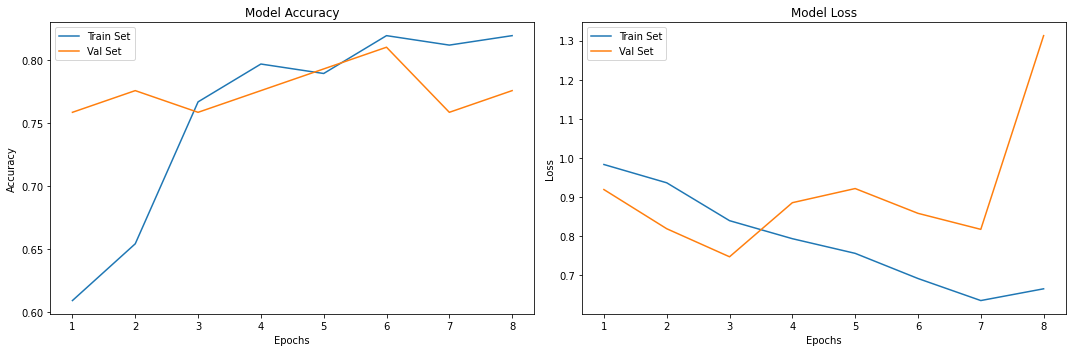

Train: 0.902, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.697674,0.775862,0.848837,0.843625,HorizontalFlip,mosaic224,77.58621,81.954885
recall,0.535714,1.000000,0.775862,0.767857,0.775862,HorizontalFlip,mosaic224,77.58621,81.954885
f1-score,0.697674,0.821918,0.775862,0.759796,0.761938,HorizontalFlip,mosaic224,77.58621,81.954885
support,28.000000,30.000000,0.775862,58.000000,58.000000,HorizontalFlip,mosaic224,77.58621,81.954885


In [32]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults1=dResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults1)
keras.backend.clear_session()


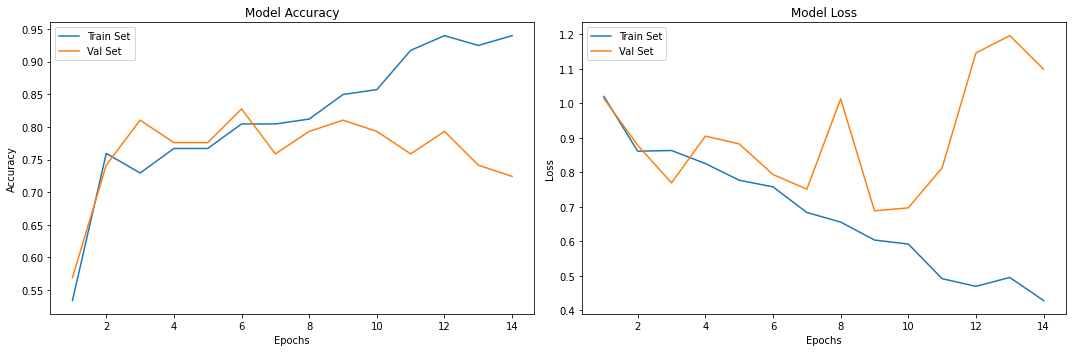

Train: 0.977, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.850000,0.710526,0.758621,0.780263,0.777858,vertialFLip,mosaic224,72.41379,93.984962
recall,0.607143,0.900000,0.758621,0.753571,0.758621,vertialFLip,mosaic224,72.41379,93.984962
f1-score,0.708333,0.794118,0.758621,0.751225,0.752705,vertialFLip,mosaic224,72.41379,93.984962
support,28.000000,30.000000,0.758621,58.000000,58.000000,vertialFLip,mosaic224,72.41379,93.984962


In [33]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults2=dResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults2)
keras.backend.clear_session()


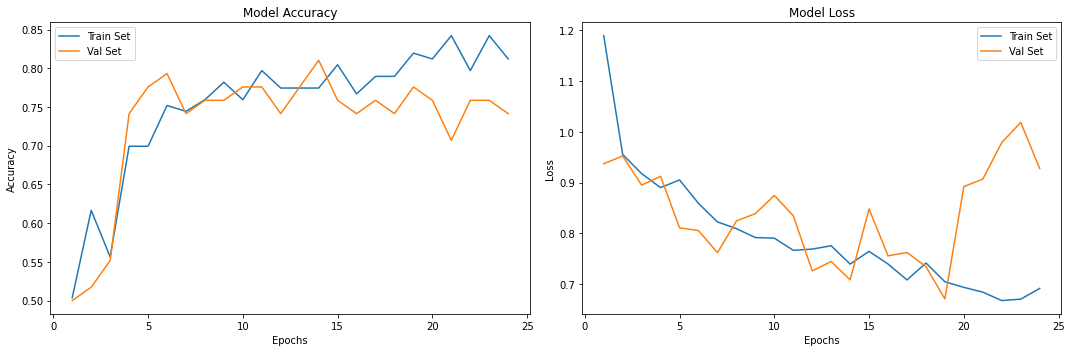

Train: 0.850, Test: 0.793


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.944444,0.725000,0.793103,0.834722,0.830939,Rotate,mosaic224,74.137932,81.203008
recall,0.607143,0.966667,0.793103,0.786905,0.793103,Rotate,mosaic224,74.137932,81.203008
f1-score,0.739130,0.828571,0.793103,0.783851,0.785393,Rotate,mosaic224,74.137932,81.203008
support,28.000000,30.000000,0.793103,58.000000,58.000000,Rotate,mosaic224,74.137932,81.203008


In [34]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults3=dResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults3)
keras.backend.clear_session()


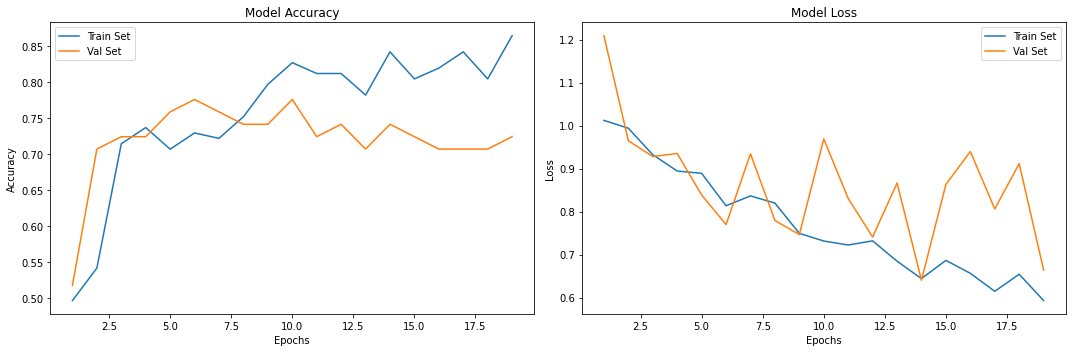

Train: 0.865, Test: 0.707


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.761905,0.675676,0.706897,0.718790,0.717304,Shear,mosaic224,72.41379,86.466163
recall,0.571429,0.833333,0.706897,0.702381,0.706897,Shear,mosaic224,72.41379,86.466163
f1-score,0.653061,0.746269,0.706897,0.699665,0.701272,Shear,mosaic224,72.41379,86.466163
support,28.000000,30.000000,0.706897,58.000000,58.000000,Shear,mosaic224,72.41379,86.466163


In [35]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults4=dResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults4)
keras.backend.clear_session()


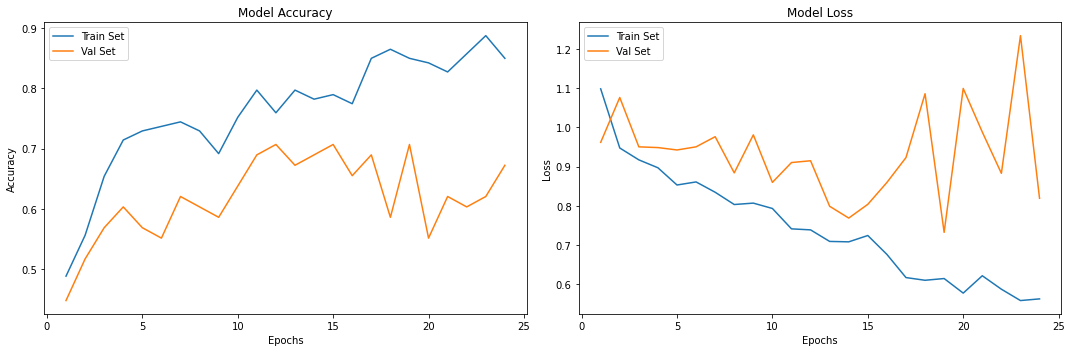

Train: 0.887, Test: 0.724


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.833333,0.675000,0.724138,0.754167,0.751437,Width,mosaic224,67.241377,84.962404
recall,0.535714,0.900000,0.724138,0.717857,0.724138,Width,mosaic224,67.241377,84.962404
f1-score,0.652174,0.771429,0.724138,0.711801,0.713857,Width,mosaic224,67.241377,84.962404
support,28.000000,30.000000,0.724138,58.000000,58.000000,Width,mosaic224,67.241377,84.962404


In [36]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults5=dResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults5)
keras.backend.clear_session()


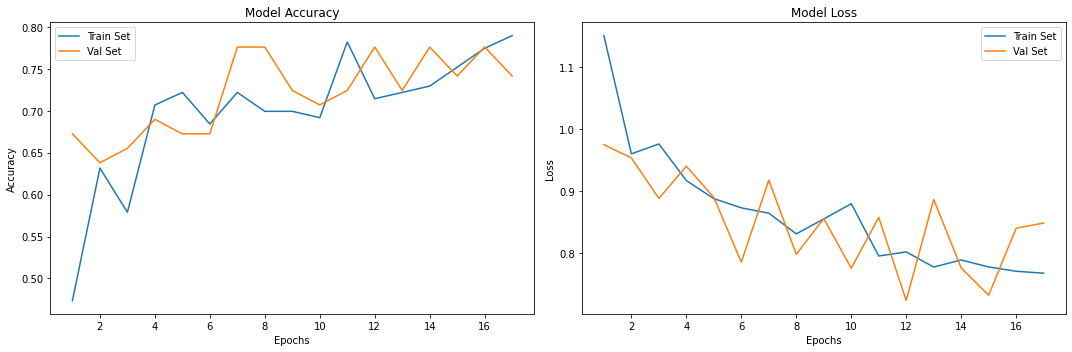

Train: 0.797, Test: 0.741


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.882353,0.682927,0.741379,0.782640,0.779202,height,mosaic224,74.137932,78.947371
recall,0.535714,0.933333,0.741379,0.734524,0.741379,height,mosaic224,74.137932,78.947371
f1-score,0.666667,0.788732,0.741379,0.727700,0.729804,height,mosaic224,74.137932,78.947371
support,28.000000,30.000000,0.741379,58.000000,58.000000,height,mosaic224,74.137932,78.947371


In [37]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults6=dResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults6)
keras.backend.clear_session()


# starry_night224 Dataset

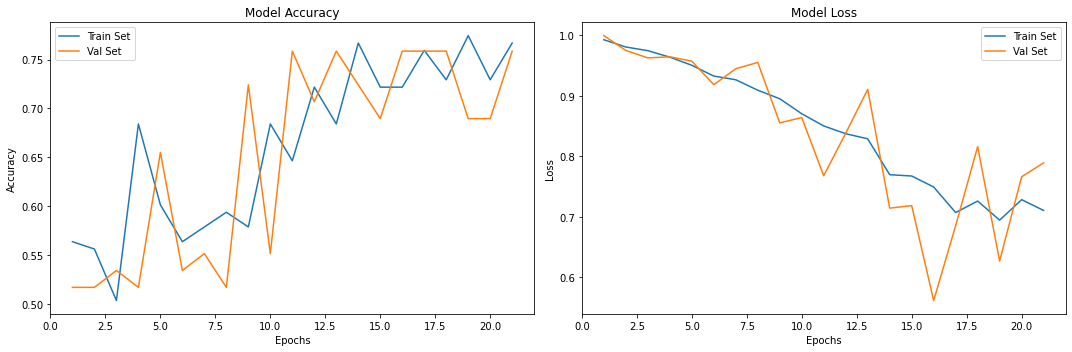

Train: 0.669, Test: 0.586


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.555556,0.586207,0.777778,0.770115,No Aug,starry_night224,75.862068,76.691729
recall,0.142857,1.000000,0.586207,0.571429,0.586207,No Aug,starry_night224,75.862068,76.691729
f1-score,0.250000,0.714286,0.586207,0.482143,0.490148,No Aug,starry_night224,75.862068,76.691729
support,28.000000,30.000000,0.586207,58.000000,58.000000,No Aug,starry_night224,75.862068,76.691729


In [38]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults=eResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults)
keras.backend.clear_session()


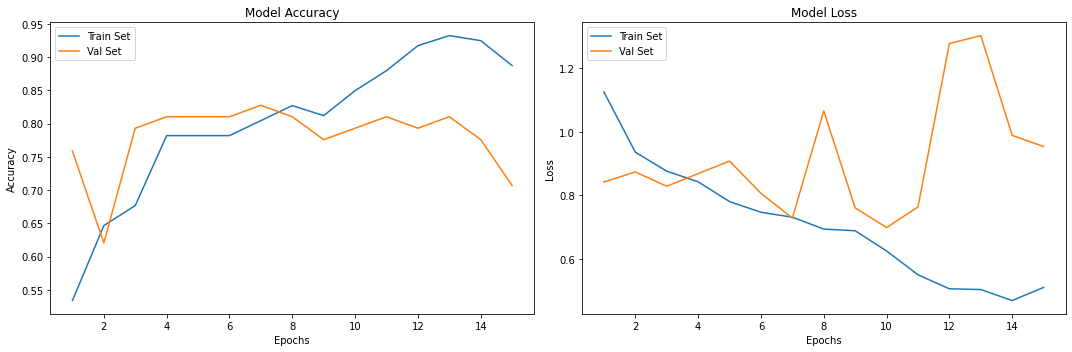

Train: 0.962, Test: 0.707


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.703704,0.709677,0.706897,0.706691,0.706794,HorizontalFlip,starry_night224,70.689654,88.721806
recall,0.678571,0.733333,0.706897,0.705952,0.706897,HorizontalFlip,starry_night224,70.689654,88.721806
f1-score,0.690909,0.721311,0.706897,0.706110,0.706634,HorizontalFlip,starry_night224,70.689654,88.721806
support,28.000000,30.000000,0.706897,58.000000,58.000000,HorizontalFlip,starry_night224,70.689654,88.721806


In [39]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults1=eResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults1)
keras.backend.clear_session()


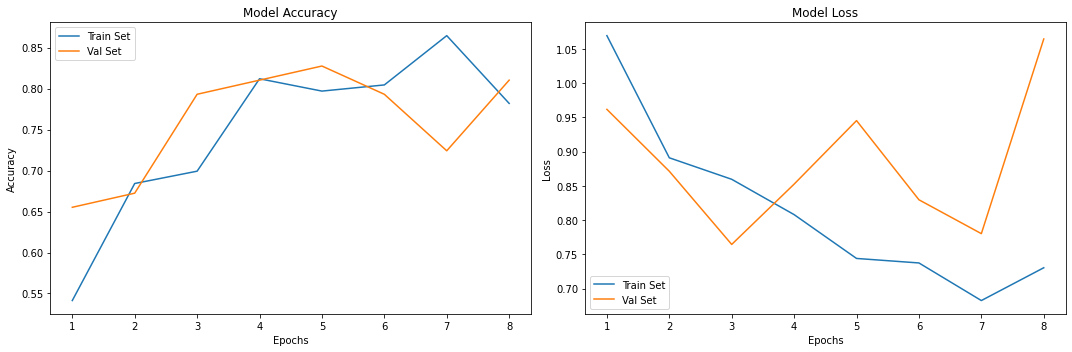

Train: 0.850, Test: 0.793


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.714286,0.793103,0.857143,0.852217,vertialFLip,starry_night224,81.034482,78.195488
recall,0.571429,1.000000,0.793103,0.785714,0.793103,vertialFLip,starry_night224,81.034482,78.195488
f1-score,0.727273,0.833333,0.793103,0.780303,0.782132,vertialFLip,starry_night224,81.034482,78.195488
support,28.000000,30.000000,0.793103,58.000000,58.000000,vertialFLip,starry_night224,81.034482,78.195488


In [40]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults2=eResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults2)
keras.backend.clear_session()


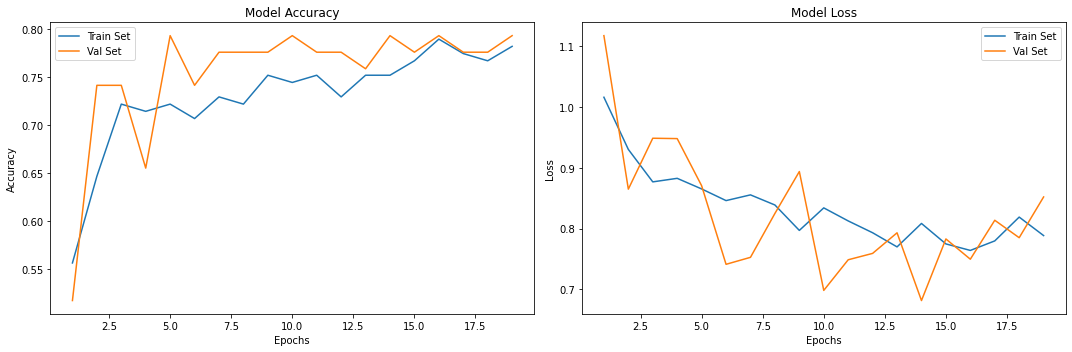

Train: 0.812, Test: 0.793


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.863636,0.750000,0.793103,0.806818,0.804859,Rotate,starry_night224,79.310346,78.195488
recall,0.678571,0.900000,0.793103,0.789286,0.793103,Rotate,starry_night224,79.310346,78.195488
f1-score,0.760000,0.818182,0.793103,0.789091,0.790094,Rotate,starry_night224,79.310346,78.195488
support,28.000000,30.000000,0.793103,58.000000,58.000000,Rotate,starry_night224,79.310346,78.195488


In [41]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults3=eResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults3)
keras.backend.clear_session()


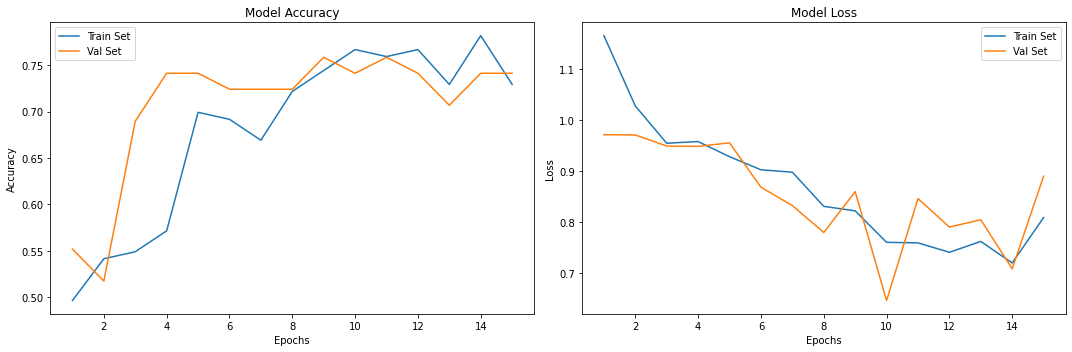

Train: 0.812, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.941176,0.707317,0.775862,0.824247,0.820215,Shear,starry_night224,74.137932,72.932333
recall,0.571429,0.966667,0.775862,0.769048,0.775862,Shear,starry_night224,74.137932,72.932333
f1-score,0.711111,0.816901,0.775862,0.764006,0.765830,Shear,starry_night224,74.137932,72.932333
support,28.000000,30.000000,0.775862,58.000000,58.000000,Shear,starry_night224,74.137932,72.932333


In [42]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight








# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults4=eResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults4)
keras.backend.clear_session()


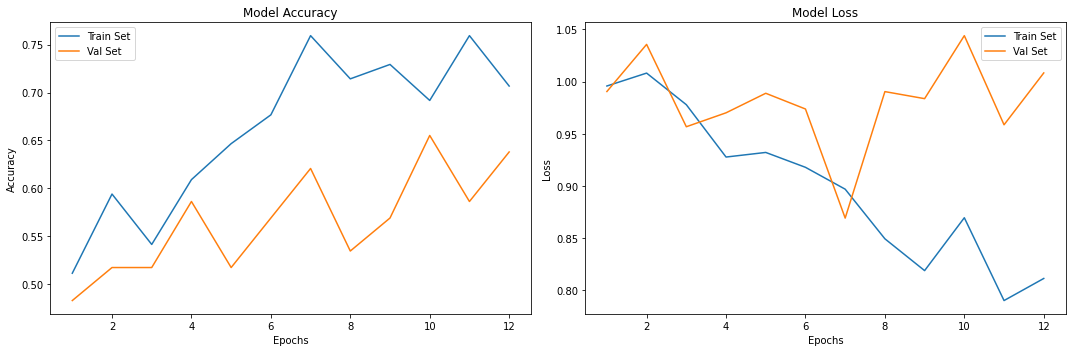

Train: 0.759, Test: 0.724


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.652174,0.724138,0.826087,0.820090,Width,starry_night224,63.793105,70.67669
recall,0.428571,1.000000,0.724138,0.714286,0.724138,Width,starry_night224,63.793105,70.67669
f1-score,0.600000,0.789474,0.724138,0.694737,0.698004,Width,starry_night224,63.793105,70.67669
support,28.000000,30.000000,0.724138,58.000000,58.000000,Width,starry_night224,63.793105,70.67669


In [43]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults5=eResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults5)
keras.backend.clear_session()


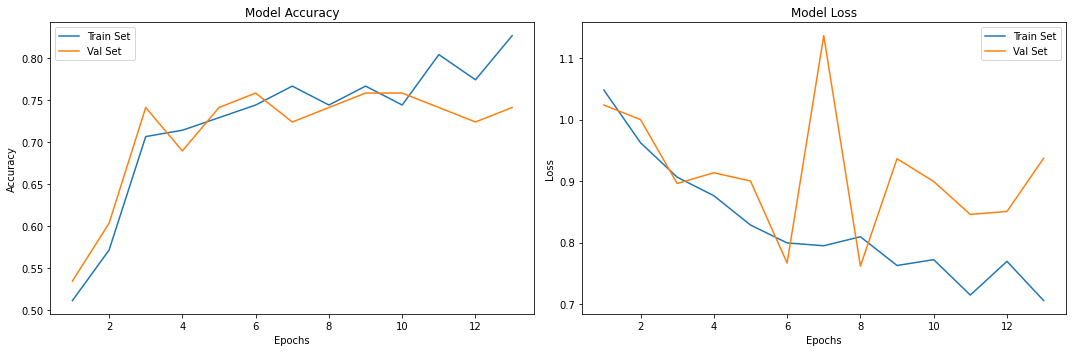

Train: 0.827, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.888889,0.700000,0.758621,0.794444,0.791188,height,starry_night224,74.137932,82.706767
recall,0.571429,0.933333,0.758621,0.752381,0.758621,height,starry_night224,74.137932,82.706767
f1-score,0.695652,0.800000,0.758621,0.747826,0.749625,height,starry_night224,74.137932,82.706767
support,28.000000,30.000000,0.758621,58.000000,58.000000,height,starry_night224,74.137932,82.706767


In [44]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults6=eResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults6)
keras.backend.clear_session()


#the_scream224 Dataset




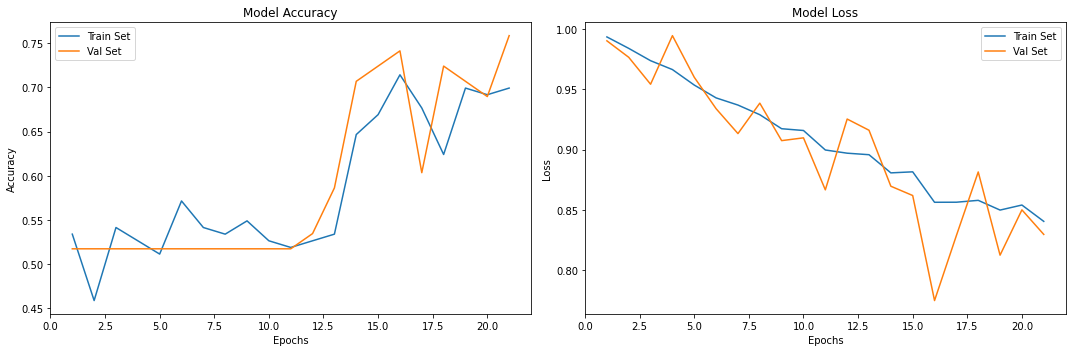

Train: 0.526, Test: 0.517


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.0,0.517241,0.517241,0.258621,0.267539,No Aug,the_scream224,75.862068,69.924814
recall,0.0,1.000000,0.517241,0.500000,0.517241,No Aug,the_scream224,75.862068,69.924814
f1-score,0.0,0.681818,0.517241,0.340909,0.352665,No Aug,the_scream224,75.862068,69.924814
support,28.0,30.000000,0.517241,58.000000,58.000000,No Aug,the_scream224,75.862068,69.924814


In [45]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset6[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
fResults=fResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(fResults)
keras.backend.clear_session()


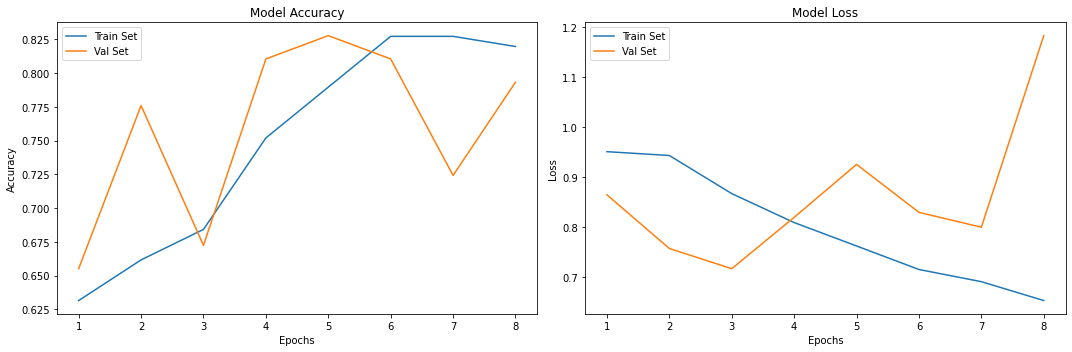

Train: 0.895, Test: 0.810


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.731707,0.810345,0.865854,0.861228,HorizontalFlip,the_scream224,79.310346,81.954885
recall,0.607143,1.000000,0.810345,0.803571,0.810345,HorizontalFlip,the_scream224,79.310346,81.954885
f1-score,0.755556,0.845070,0.810345,0.800313,0.801856,HorizontalFlip,the_scream224,79.310346,81.954885
support,28.000000,30.000000,0.810345,58.000000,58.000000,HorizontalFlip,the_scream224,79.310346,81.954885


In [46]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset6[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
fResults1=fResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(fResults1)
keras.backend.clear_session()


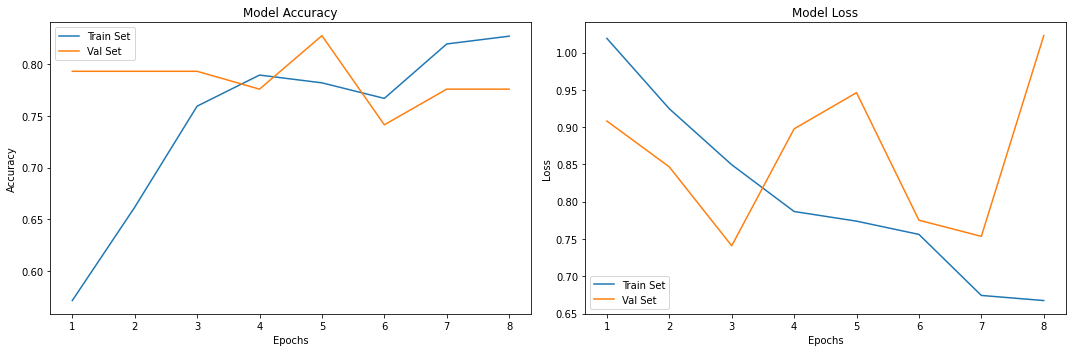

Train: 0.917, Test: 0.793


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.900000,0.736842,0.793103,0.818421,0.815608,vertialFLip,the_scream224,77.58621,82.706767
recall,0.642857,0.933333,0.793103,0.788095,0.793103,vertialFLip,the_scream224,77.58621,82.706767
f1-score,0.750000,0.823529,0.793103,0.786765,0.788032,vertialFLip,the_scream224,77.58621,82.706767
support,28.000000,30.000000,0.793103,58.000000,58.000000,vertialFLip,the_scream224,77.58621,82.706767


In [47]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset6[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
fResults2=fResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(fResults2)
keras.backend.clear_session()


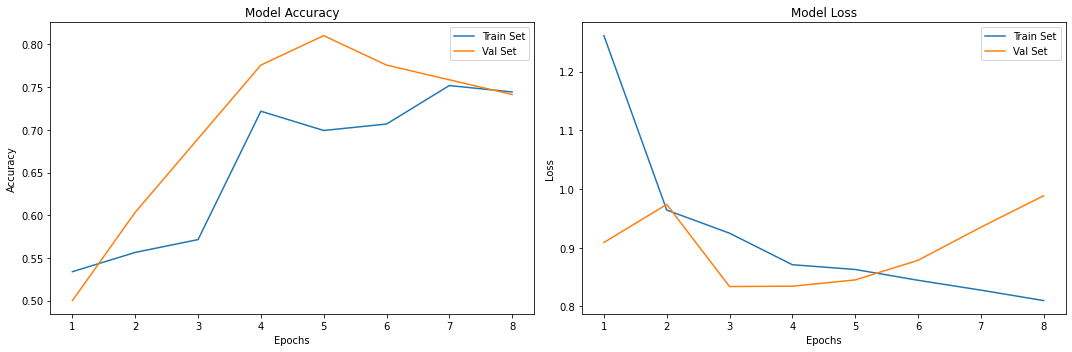

Train: 0.744, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.681818,0.758621,0.840909,0.835423,Rotate,the_scream224,74.137932,74.436092
recall,0.500000,1.000000,0.758621,0.750000,0.758621,Rotate,the_scream224,74.137932,74.436092
f1-score,0.666667,0.810811,0.758621,0.738739,0.741224,Rotate,the_scream224,74.137932,74.436092
support,28.000000,30.000000,0.758621,58.000000,58.000000,Rotate,the_scream224,74.137932,74.436092


In [48]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset6[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
fResults3=fResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(fResults3)
keras.backend.clear_session()


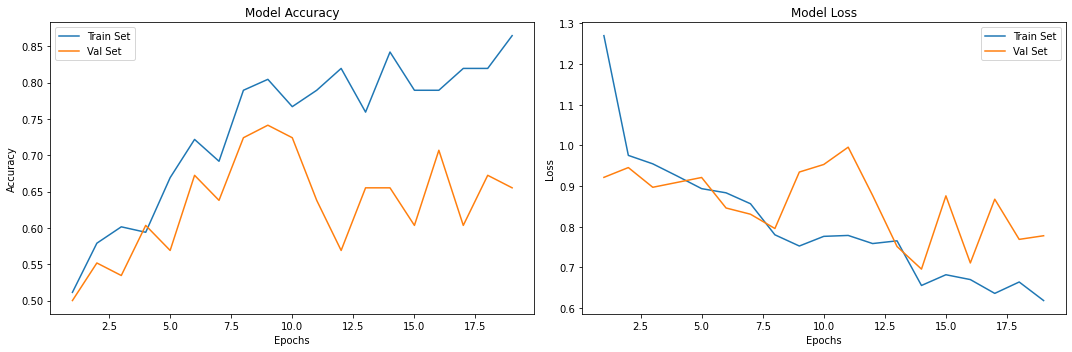

Train: 0.850, Test: 0.707


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.739130,0.685714,0.706897,0.712422,0.711501,Shear,the_scream224,65.517241,86.466163
recall,0.607143,0.800000,0.706897,0.703571,0.706897,Shear,the_scream224,65.517241,86.466163
f1-score,0.666667,0.738462,0.706897,0.702564,0.703802,Shear,the_scream224,65.517241,86.466163
support,28.000000,30.000000,0.706897,58.000000,58.000000,Shear,the_scream224,65.517241,86.466163


In [49]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight








# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset6[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
fResults4=fResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(fResults4)
keras.backend.clear_session()


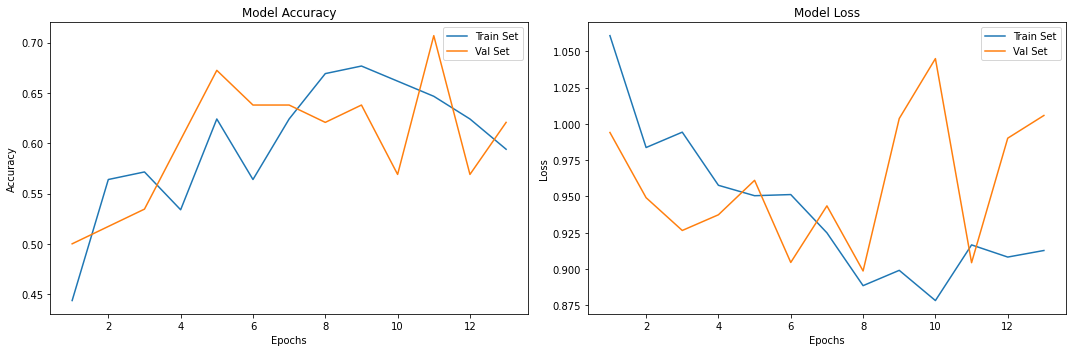

Train: 0.692, Test: 0.621


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.576923,0.62069,0.788462,0.781167,Width,the_scream224,62.068963,59.398496
recall,0.214286,1.000000,0.62069,0.607143,0.620690,Width,the_scream224,62.068963,59.398496
f1-score,0.352941,0.731707,0.62069,0.542324,0.548855,Width,the_scream224,62.068963,59.398496
support,28.000000,30.000000,0.62069,58.000000,58.000000,Width,the_scream224,62.068963,59.398496


In [50]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset6[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
fResults5=fResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(fResults5)
keras.backend.clear_session()


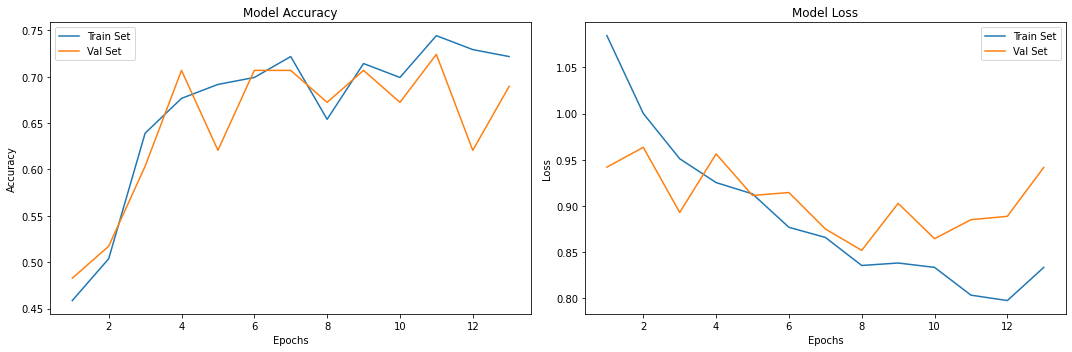

Train: 0.812, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.894737,0.717949,0.775862,0.806343,0.803295,height,the_scream224,68.965518,72.18045
recall,0.607143,0.933333,0.775862,0.770238,0.775862,height,the_scream224,68.965518,72.18045
f1-score,0.723404,0.811594,0.775862,0.767499,0.769020,height,the_scream224,68.965518,72.18045
support,28.000000,30.000000,0.775862,58.000000,58.000000,height,the_scream224,68.965518,72.18045


In [51]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset6[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
fResults6=fResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(fResults6)
keras.backend.clear_session()


# Results

In [52]:
Final=pd.DataFrame([])
Final=Final.append(Results)
Final=Final.append(Results1)
Final=Final.append(Results2)
Final=Final.append(Results3)
Final=Final.append(Results4)
Final=Final.append(Results5)
Final=Final.append(Results6)

Final=Final.append(aResults)
Final=Final.append(aResults1)
Final=Final.append(aResults2)
Final=Final.append(aResults3)
Final=Final.append(aResults4)
Final=Final.append(aResults5)
Final=Final.append(aResults6)

Final=Final.append(bResults)
Final=Final.append(bResults1)
Final=Final.append(bResults2)
Final=Final.append(bResults3)
Final=Final.append(bResults4)
Final=Final.append(bResults5)
Final=Final.append(bResults6)

Final=Final.append(cResults)
Final=Final.append(cResults1)
Final=Final.append(cResults2)
Final=Final.append(cResults3)
Final=Final.append(cResults4)
Final=Final.append(cResults5)
Final=Final.append(cResults6)

Final=Final.append(dResults)
Final=Final.append(dResults1)
Final=Final.append(dResults2)
Final=Final.append(dResults3)
Final=Final.append(dResults4)
Final=Final.append(dResults5)
Final=Final.append(dResults6)

Final=Final.append(eResults)
Final=Final.append(eResults1)
Final=Final.append(eResults2)
Final=Final.append(eResults3)
Final=Final.append(eResults4)
Final=Final.append(eResults5)
Final=Final.append(eResults6)

Final=Final.append(fResults)
Final=Final.append(fResults1)
Final=Final.append(fResults2)
Final=Final.append(fResults3)
Final=Final.append(fResults4)
Final=Final.append(fResults5)
Final=Final.append(fResults6)

pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Final)

,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,1.000000,0.535714,0.551724,0.767857,0.759852,No Aug,candy224,79.310346,77.443612
recall,0.071429,1.000000,0.551724,0.535714,0.551724,No Aug,candy224,79.310346,77.443612
f1-score,0.133333,0.697674,0.551724,0.415504,0.425234,No Aug,candy224,79.310346,77.443612
support,28.000000,30.000000,0.551724,58.000000,58.000000,No Aug,candy224,79.310346,77.443612
precision,1.000000,0.731707,0.810345,0.865854,0.861228,HorizontalFlip,candy224,79.310346,83.458644
recall,0.607143,1.000000,0.810345,0.803571,0.810345,HorizontalFlip,candy224,79.310346,83.458644
f1-score,0.755556,0.845070,0.810345,0.800313,0.801856,HorizontalFlip,candy224,79.310346,83.458644
support,28.000000,30.000000,0.810345,58.000000,58.000000,HorizontalFlip,candy224,79.310346,83.458644
precision,0.947368,0.743590,0.810345,0.845479,0.841966,vertialFLip,candy224,81.034482,81.203008
recall,0.642857,0.966667,0.810345,0.804762,0.810345,vertialFLip,candy224,81.034482,81.203008
